In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data (tab-separated, with French column names)
file_path = fr'C:/Users/jeand/Downloads/EURVNDSPOT_2025-07-25.txt'
data = pd.read_csv(file_path, sep='\t', parse_dates=['date'], dayfirst=True).dropna(axis=1, how='all')  # 'dayfirst=True' because dates are in dd/mm/yyyy format
# Set 'date' as index and sort (critical for time series)
d2 = data['date'].apply(lambda x: x.strftime('%d/%m/%Y %H:%M:%S'))  # Format dates for plotting
data = data.set_index('date').sort_index()  # Sort to ensure chronological order
dates = data.index
print(data)
# Extract closing prices ('clot' column)
close_prices = data['clot']
dates = data.index

                           ouv       haut        bas       clot  vol devise
date                                                                       
2025-07-25 00:36:00  30710.929  30710.929  30707.321  30710.929    0    VND
2025-07-25 00:38:00  30712.734  30712.734  30703.713  30712.734    0    VND
2025-07-25 00:40:00  30710.929  30710.929  30707.321  30710.929    0    VND
2025-07-25 00:42:00  30710.929  30710.929  30707.321  30710.929    0    VND
2025-07-25 00:44:00  30707.321  30712.734  30707.321  30712.734    0    VND
...                        ...        ...        ...        ...  ...    ...
2025-07-25 09:44:00  30738.477  30738.477  30731.249  30731.249    0    VND
2025-07-25 09:46:00  30727.637  30736.670  30727.637  30731.249    0    VND
2025-07-25 09:48:00  30727.637  30727.637  30720.414  30727.049    0    VND
2025-07-25 09:50:00  30730.661  30730.661  30718.022  30718.022    0    VND
2025-07-25 09:52:00  30719.827  30727.049  30719.827  30719.827    0    VND

[279 rows x

In [2]:
d2

0      25/07/2025 00:36:00
1      25/07/2025 00:38:00
2      25/07/2025 00:40:00
3      25/07/2025 00:42:00
4      25/07/2025 00:44:00
              ...         
274    25/07/2025 09:44:00
275    25/07/2025 09:46:00
276    25/07/2025 09:48:00
277    25/07/2025 09:50:00
278    25/07/2025 09:52:00
Name: date, Length: 279, dtype: object

In [3]:
def format_date_heure(x): # date/heure pour axe x
    global memo
    jour = x[:2]
    heure = x[11:16]
    if jour == memo:
        jour = ''
    memo = x[:2]
    return jour+'\n'+heure
memo = ''
d = d2.apply(lambda x: format_date_heure(x))
d

0      25\n00:36
1        \n00:38
2        \n00:40
3        \n00:42
4        \n00:44
         ...    
274      \n09:44
275      \n09:46
276      \n09:48
277      \n09:50
278      \n09:52
Name: date, Length: 279, dtype: object

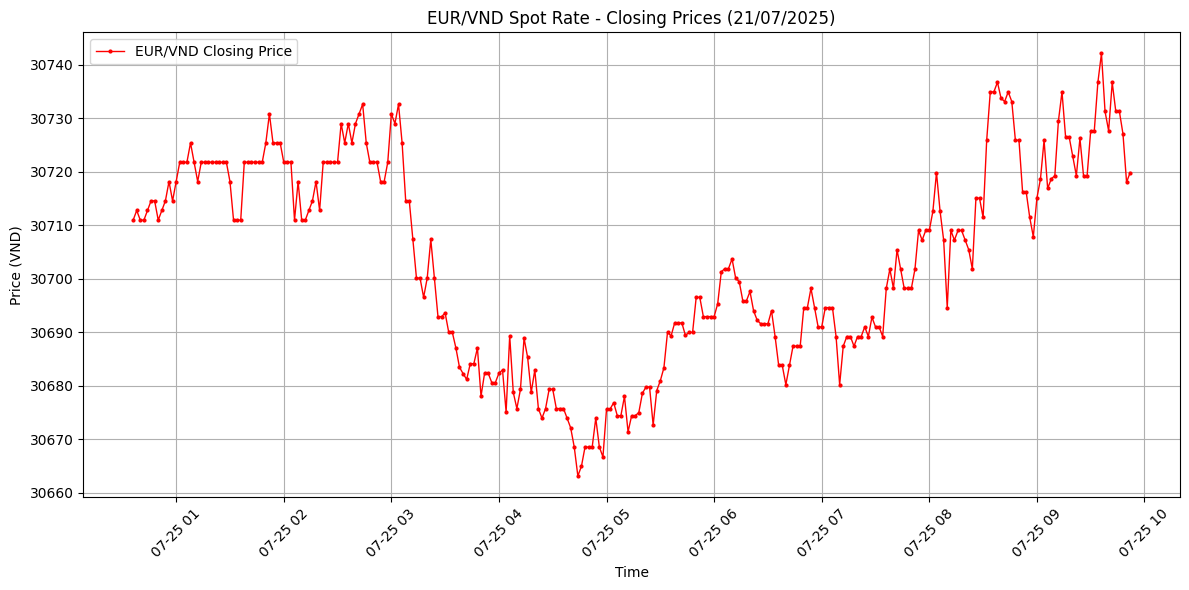

In [4]:
# Plot
plt.figure(figsize=(12, 6))
plt.plot(dates, close_prices, label='EUR/VND Closing Price', color='red', marker='o', markersize=2, linestyle='-', linewidth=1)
plt.title('EUR/VND Spot Rate - Closing Prices (21/07/2025)')
plt.xlabel('Time')
plt.ylabel('Price (VND)')
#plt.xticks(ticks=range(len(d)), labels=d)
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent label cutoff
plt.show()

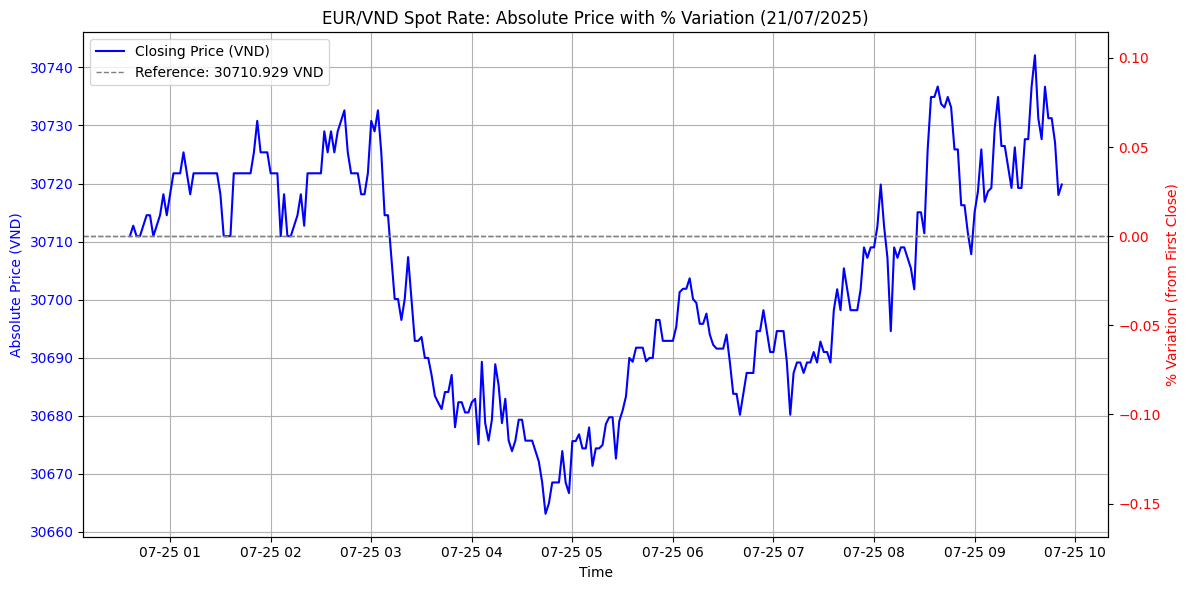

In [5]:
# Calculate % variation from first closing price
first_close = data['clot'].iloc[0]
data['pct_change'] = (data['clot'] / first_close - 1) * 100

# Create figure and primary axis (left, absolute price)
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.plot(dates, data['clot'], color='blue', label='Closing Price (VND)')
ax1.set_xlabel('Time')
ax1.set_ylabel('Absolute Price (VND)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True)

# Add secondary axis (right, % variation)
ax2 = ax1.twinx()
ax2.set_ylabel('% Variation (from First Close)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# --- Key Fix: Sync axes so 0% aligns with first_close ---
def sync_axes(ax1, ax2, first_close):
    """Sync left (absolute) and right (%) axes."""
    y1_min, y1_max = ax1.get_ylim()
    # Convert left axis limits to % variation
    pct_min = (y1_min / first_close - 1) * 100
    pct_max = (y1_max / first_close - 1) * 100
    ax2.set_ylim(pct_min, pct_max)

sync_axes(ax1, ax2, first_close)  # Apply synchronization

# Optional: Mark reference price and 0% line
ax1.axhline(y=first_close, color='gray', linestyle='--', linewidth=1, label=f'Reference: {first_close} VND')
ax2.axhline(y=0, color='gray', linestyle='--', linewidth=1)  # 0% line (redundant but clear)

# Title and legend
plt.title('EUR/VND Spot Rate: Absolute Price with % Variation (21/07/2025)')
ax1.legend(loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
